<a href="https://colab.research.google.com/github/Purvsoni/132_PurvSoni/blob/main/Lab10/132_CNN_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment

Try CNN on "Fruit" dataset. Also modify number of layers and observe the performance difference: 
https://www.kaggle.com/moltean/fruits

Or 

(In a case if you don't have that much dataPack available, download 20 images of apple and 20 images of orange from the internet and work on it with RANDOM state=Rollnumber stratergy, 80-20% training-testing division)

I have download the dataset from here --> https://www.kaggle.com/balraj98/apple2orange-dataset
This dataset is specifically for apple and orange only

References:
https://www.tensorflow.org/tutorials/load_data/images
https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory


In [23]:
# Import all the libraries here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For image handling
import os
import PIL
import PIL.Image
import tensorflow as tf

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Path for dataset
data_dir = '/content/drive/My Drive/Colab Notebooks/ML/Lab10/dataset/'

In [26]:
# Parameters
batch_size = 10
img_height = 256
img_width = 256

In [27]:
print(tf.__version__)

2.6.0


In [28]:
# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
              data_dir,
              validation_split=0.2,
              subset="training",
              seed=132,
              image_size=(img_height, img_width),
              batch_size=batch_size
            )

Found 40 files belonging to 2 classes.
Using 32 files for training.


In [29]:
val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=0.2,
            subset="validation",
            seed=132,
            image_size=(img_height, img_width),
            batch_size=batch_size
         )

Found 40 files belonging to 2 classes.
Using 8 files for validation.


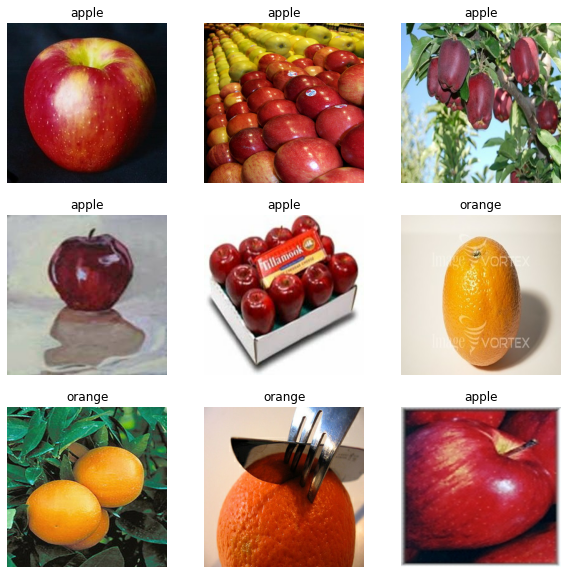

In [30]:
# Visualize the data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [31]:
class_names = train_ds.class_names
print(class_names)

['apple', 'orange']


In [32]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 256, 256, 3)
(10,)


In [33]:
# Standardize the data
# The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; 
# in general you should seek to make your input values small.
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [34]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [35]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [37]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [38]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
4/4 [==============================] - 4s 922ms/step - loss: 1.6441 - accuracy: 0.3750 - val_loss: 0.6047 - val_accuracy: 0.6250
Epoch 2/10
4/4 [==============================] - 3s 664ms/step - loss: 0.5552 - accuracy: 0.7188 - val_loss: 1.2721 - val_accuracy: 0.2500
Epoch 3/10
4/4 [==============================] - 3s 647ms/step - loss: 0.6083 - accuracy: 0.6875 - val_loss: 0.6054 - val_accuracy: 0.6250
Epoch 4/10
4/4 [==============================] - 3s 782ms/step - loss: 0.2513 - accuracy: 0.9375 - val_loss: 0.6696 - val_accuracy: 0.6250
Epoch 5/10
4/4 [==============================] - 4s 821ms/step - loss: 0.1316 - accuracy: 0.9688 - val_loss: 0.3519 - val_accuracy: 0.7500
Epoch 6/10
4/4 [==============================] - 3s 618ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.4613 - val_accuracy: 0.8750
Epoch 7/10
4/4 [==============================] - 3s 610ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.3154 - val_accuracy: 0.8750
Epoch 8/10
4/4 [====